## HW2

## Question 01

In [328]:
# Deadline for each project(in months)
p1_deadline = 3
p2_deadline = 4
p3_deadline = 2

# Number of worker-months of labor of each project.
p1_labor = 8
p2_labor = 10
p3_labor = 12

# Number of workers woreked in each project
p1_workers = p1_labor / p1_deadline
p2_workers = p2_labor / p2_deadline
p3_workers = p3_labor / p3_deadline

if p1_workers > 6 || p2_workers > 6 || p3_workers > 6
    println("It is not possible to complete all three projects on time.")
elseif (p1_workers + p2_workers + p3_workers) > 8
    println("It is not possible to complete all three projects on time.")
else
    println("It is possible to complete all three projects on time.")
end


It is not possible to complete all three projects on time.


## Question 2

In [329]:
println("QUESTION 2A:")
println("a. Decision variables:")
println("x1, x2,..., x77: the amount of each food in the diet.")

println("Constraints:")
println("Considering x_i as the total amounts of food in diet (in units of 1 dollar),")
println("y_j as the minimum recommended daily allowance of the j nutrient,")
println("a_{ij} as the amount of the jth nutrient contained in the ith food,")
println("The constraint states that the sum of the amounts of each nutrient in the 77 foods must be greater than or equal to the minimum RDA of that nutrient")
println("Hence, we have: a_{ij} * x_i >= y_j (for i = 1, 2,...,77 and j = 1, 2,.., 9)")

println("The objective: to minimize the sum of the costs of all 77 foods, which is c_i * x_i where c_i represents the cost of food i (for i = 1, 2,...,77 )")

QUESTION 2A:
a. Decision variables:
x1, x2,..., x77: the amount of each food in the diet.
Constraints:
Considering x_i as the total amounts of food in diet (in units of 1 dollar),
y_j as the minimum recommended daily allowance of the j nutrient,
a_{ij} as the amount of the jth nutrient contained in the ith food,
The constraint states that the sum of the amounts of each nutrient in the 77 foods must be greater than or equal to the minimum RDA of that nutrient
Hence, we have: a_{ij} * x_i >= y_j (for i = 1, 2,...,77 and j = 1, 2,.., 9)
The objective: to minimize the sum of the costs of all 77 foods, which is c_i * x_i where c_i represents the cost of food i (for i = 1, 2,...,77 )


In [330]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("NamedArrays")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [331]:
using NamedArrays, CSV, DataFrames, JuMP, HiGHS, LinearAlgebra

# import Stigler's data set
raw = CSV.read("stigler.csv", DataFrame);
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

# list of food
foods = raw[2:end,1]
# list of nutrients
nutrients = [string(names(raw)[i]) for i=2:length(names(raw))]

# minimum required amount of each nutrient
lower = Dict( zip(nutrients,raw[1,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f 
dataraw = Matrix(values(raw[2:end,2:end]))
data = NamedArray(dataraw,(foods,nutrients),("foods","nutrients"))              
        
println("Foods:\n")
for i in foods
    println(i)
end

println("\n\nNutrient Lower Bounds:\n")
for j in nutrients
    println(j," at least: ",lower[j])
end
                
println("")


Foods:

Wheat Flour (Enriched)
Macaroni
Wheat Cereal (Enriched)
Corn Flakes
Corn Meal
Hominy Grits
Rice
Rolled Oats
White Bread (Enriched)
Whole Wheat Bread
Rye Bread
Pound Cake
Soda Crackers
Milk
Evaporated Milk (can)
Butter
Oleomargarine
Eggs
Cheese (Cheddar)
Cream
Peanut Butter
Mayonnaise
Crisco
Lard
Sirloin Steak
Round Steak
Rib Roast
Chuck Roast
Plate
Liver (Beef)
Leg of Lamb
Lamb Chops (Rib)
Pork Chops
Pork Loin Roast
Bacon
Ham, smoked
Salt Pork
Roasting Chicken
Veal Cutlets
Salmon, Pink (can)
Apples
Bananas
Lemons
Oranges
Green Beans
Cabbage
Carrots
Celery
Lettuce
Onions
Potatoes
Spinach
Sweet Potatoes
Peaches (can)
Pears (can)
Pineapple (can)
Asparagus (can)
Green Beans (can)
Pork and Beans (can)
Corn (can)
Peas (can)
Tomatoes (can)
Tomato Soup (can)
Peaches, Dried
Prunes, Dried
Raisins, Dried
Peas, Dried
Lima Beans, Dried
Navy Beans, Dried
Coffee
Tea
Cocoa
Chocolate
Sugar
Corn Syrup
Molasses
Strawberry Preserves


Nutrient Lower Bounds:

Calories (1000) at least: 3.0
Protein (

In [332]:
println("QUESTION 2B:")
m = Model(HiGHS.Optimizer)

@variable(m, x[1:77] >= 0)

for i = 1:9
    @constraint(m, x[1:77]'*data[:,i]>= lower[nutrients[i]] * 365)
end
                    
@objective(m, Min, sum(x[1:77]) )

optimize!(m)
                
println("Optimal diet:")
for i = 1:77
     if value.(x[i]) > 0
         println(foods[i],": ", value.(x[i])/365, " units per day")
     end
end

QUESTION 2B:
Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
9 rows, 40 cols, 317 nonzeros
9 rows, 27 cols, 213 nonzeros
Presolve : Reductions: rows 9(-0); columns 27(-50); elements 213(-357)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 9(27899.7) 0s
          5     3.9661731545e+01 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 5
Objective value     :  3.9661731545e+01
HiGHS run time      :          0.00
Optimal diet:
Wheat Flour (Enriched): 0.029519061676488274 units per day
Liver (Beef): 0.001892557290705262 units per day
Cabbage: 0.01121443524614487 units per day
Spinach: 0.005007660466725203 units per day
Navy Beans, Dried: 0.06102856352669323 units per day


In [333]:
using DataFrames
LP_value = dataraw'*value.(x)/365
df2 = DataFrame(Nutrients=[], lower_bound=[], LP_solution=[])
for i= 1:9
    push!(df2,(nutrients[i],lower[nutrients[i]],LP_value[i]))
end 
df2

Row,Nutrients,lower_bound,LP_solution
,Any,Any,Any
1,Calories (1000),3.0,3.0
2,Protein (g),70,147.414
3,Calcium (g),0.8,0.8
4,Iron (mg),12,60.4669
5,Vitamin A (1000 IU),5.0,5.0
6,Thiamine (mg),1.8,4.12044
7,Riboflavin (mg),2.7,2.7
8,Niacin (mg),18,27.316
9,Ascorbic Acid (mg),75,75.0


In [334]:
println("QUESTION 2C:")
println("lower bounds for each nutrient alongside the amount of nutrient in the optimal diet, and Dual Variables:")   
using NamedArrays, CSV, DataFrames, JuMP, HiGHS, LinearAlgebra
m = Model(HiGHS. Optimizer)
@variable(m,z[1:9] >= 0)
for j=1:length(x)
    @constraint(m,z[1:9]'*(data[j,:])<=1)
end
@objective(m, Max, sum(df2[:,2]'*z[1:9]*365))
optimize!(m)
for i in 1:length(nutrients)
    if value.(z[i]) > 0
        println(nutrients[i]," at least: ",lower[nutrients[i]], " with optimal intake: ", value.(z[i])/365)
    end
end


QUESTION 2C:
lower bounds for each nutrient alongside the amount of nutrient in the optimal diet, and Dual Variables:
Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
40 rows, 9 cols, 317 nonzeros
27 rows, 9 cols, 213 nonzeros
Presolve : Reductions: rows 27(-50); columns 9(-0); elements 213(-357)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -7.5694473524e+02 Ph1: 27(349.212); Du: 8(756.945) 0s
          8    -3.9661731545e+01 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 8
Objective value     :  3.9661731545e+01
HiGHS run time      :          0.00
Calories (1000) at least: 3.0 with optimal intake: 2.401410218643696e-5
Calcium (g) at least: 0.8 with optimal intake: 8.695263957708775e-5
Vitamin A (1000 IU) at least: 5.0 with optimal intake: 1.

In [335]:
m1 = Model(HiGHS.Optimizer)
@variable(m1, x[foods] >= 0)

@constraint(m1, x["Liver (Beef)"] == 0)
@constraint(m1, x["Milk"] >= 0.01)
for j = 1:length(x)
    @constraint(m1, x[1:9]'*data[j,:] <= 1)
end
                    
@objective(m1,Max,sum(df2[:,2]'*x[1:9]*365) )
println(value.(x[2]))
optimize!(m1)
println(value.(y))

LoadError: KeyError: key 1 not found

## Question 3

In [336]:
println("The decision variable is the radius of the museum, r.")

println("The constraint: ")
println("r >= 0")
println("(w - r) >= 75 where w is the width of the site") 
println("(l - r) >= 75 where l is the length of the site")
println("It means that the distance between the center of the museum and each of 4 edges of the site must be at least 75 feet")

println("The objective function is to maximize the radius r")

The decision variable is the radius of the museum, r.
The constraint: 
r >= 0
(w - r) >= 75 where w is the width of the site
(l - r) >= 75 where l is the length of the site
It means that the distance between the center of the museum and each of 4 edges of the site must be at least 75 feet
The objective function is to maximize the radius r


In [337]:
# If you haven't yet installed the linear algebra package, do the standard thing:
using Pkg
Pkg.add("LinearAlgebra")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [338]:
println("QUESTION 3B:")
using JuMP, HiGHS, LinearAlgebra
using PyPlot

A = [2/3 1; 3 -1; 0 1; -1 0; 0 -1]
b = [700; 1500; 500; 0; 0]

# Define the model
m = Model(HiGHS.Optimizer)

# Define decision variables
@variable(m, x[1:2] >= 75) # coordinates of center
@variable(m, r >= 0) # radius of the sphere

# Define the objective
@objective(m, Max, r)

for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x + r*norm(A[i,:]) <= b[i])
end
@objective(m, Max, r)     # maximize radius of the sphere

optimize!(m)
center = value.(x)
radius = value(r)

println("The coordinates of the Chebyshev center are: ", center)
println("The largest possible radius is: ", radius)


QUESTION 3B:
Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
5 rows, 3 cols, 12 nonzeros
5 rows, 3 cols, 12 nonzeros
Presolve : Reductions: rows 5(-0); columns 3(-0); elements 12(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -9.9999858935e-01 Ph1: 5(7.36413); Du: 1(0.999999) 0s
          4     2.4402852679e+02 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 4
Objective value     :  2.4402852679e+02
HiGHS run time      :          0.00
The coordinates of the Chebyshev center are: [244.02852679380192, 244.0285267938019]
The largest possible radius is: 244.02852679380186


In [339]:
using Pkg
Pkg.add("PyPlot")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


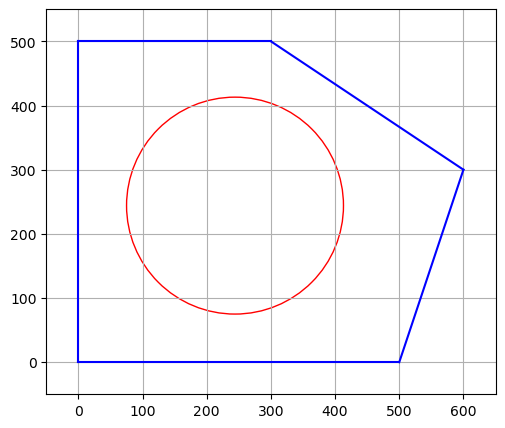

PyObject <matplotlib.patches.Circle object at 0x1455420b0>

In [340]:
using PyPlot

# Defining a function to plot the outline of the museum area
function plot_site(mode)
    plot([0,0], [0,500], "b-")
    plot([0,500], [0,0], "b-")
    plot([500,600], [0,300],"b-")
    plot([300,600], [500,300],"b-")
    plot([0,300], [500,500],"b-")
    axis("image")
    axis([-.5,6.5,-.5,5.5]*100)
    grid()
end

figure(figsize=(6,5))
plot_site(1)

circlel = plt.Circle((244.028, 244.028), radius = 169.028, fill=false, color ="r")
plt.gca().add_patch(circlel)